In [39]:
import pandas as pd
import datetime
import numpy as np
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler
vader = SentimentIntensityAnalyzer()

In [951]:
news_df = pd.read_csv('~/LighthouseLabs-Final/FinViz_Headline_Data/NKE_data_2020-09-28-07-07.csv', index_col=1, parse_dates=[['date','time']])
#news_df2 = pd.read_csv('~/LighthouseLabs-Final/FinViz_Headline_Data/AMZN_data_2020-09-27-23-41.csv', index_col=1, parse_dates=[['date','time']])
# Below has all the data we need:
stock_df = pd.read_csv('~/LighthouseLabs-Final/Stock_Data/NKE_data.csv', parse_dates=['Datetime'])
#twitter_df = pd.read_csv('~/LighthouseLabs-Final/AAPL_2020-09-24.csv', parse_dates=['timestamp'])

In [952]:
google_twitter_d23 = pd.read_csv('~/LighthouseLabs-Final/NKE_2020-09-23.csv', parse_dates=['timestamp'])
google_twitter_d24 = pd.read_csv('~/LighthouseLabs-Final/NKE_2020-09-24.csv', parse_dates=['timestamp'])
google_twitter_d25 = pd.read_csv('~/LighthouseLabs-Final/NKE_2020-09-25.csv', parse_dates=['timestamp'])

frames = [google_twitter_d23, google_twitter_d24, google_twitter_d25]
twitter_df = pd.concat(frames)
twitter_df.drop_duplicates(subset='tweet_text',keep=False, inplace=True)

In [953]:
frames = [google_twitter_d23, google_twitter_d24, google_twitter_d25]
twitter_df = pd.concat(frames)
twitter_df.drop_duplicates(subset='tweet_text',keep=False, inplace=True)

frames_news = [news_df, news_df2]
news_df = pd.concat(frames_news)

## Classifying Historical Stock Data:

In [981]:
stock_df['Scaled Volume'] = stock_df['Volume']/10000000
stock_df['Change in Close Price'] = stock_df['Adj Close'] - stock_df['Adj Close'].shift(1)

stock_df['Returns (1 period)'] = stock_df['Adj Close']/stock_df['Adj Close'].shift(1) - 1
stock_df['Returns (2 period)'] = stock_df['Adj Close']/stock_df['Adj Close'].shift(2) - 1
stock_df['Returns (3 period)'] = stock_df['Adj Close']/stock_df['Adj Close'].shift(3) - 1
stock_df['Returns (4 period)'] = stock_df['Adj Close']/stock_df['Adj Close'].shift(4) - 1

stock_df.head(15)

,Datetime,Open,High,Low,Close,Adj Close,Volume,Percent Price Change Within Period,MA10,MA50,Scaled Volume,Returns (1 period),Returns (2 period),Returns (3 period),Returns (4 period),Change in Close Price
0,2020-09-17 09:30:00-04:00,117.339996,118.230003,116.959999,118.019997,118.019997,804298,0.579513,NaN,NaN,0.080430,NaN,NaN,NaN,NaN,NaN
1,2020-09-17 10:00:00-04:00,118.035004,118.480003,117.739998,118.000000,118.000000,645316,-0.029655,NaN,NaN,0.064532,-0.000169,NaN,NaN,NaN,-0.019997
2,2020-09-17 10:30:00-04:00,117.970001,118.029999,117.605003,117.989998,117.989998,546657,0.016951,NaN,NaN,0.054666,-0.000085,-0.000254,NaN,NaN,-0.010002
3,2020-09-17 11:00:00-04:00,117.980003,118.540001,117.980003,117.980003,117.980003,297725,0.000000,NaN,NaN,0.029773,-0.000085,-0.000169,-0.000339,NaN,-0.009995
4,2020-09-17 11:30:00-04:00,117.980003,118.221001,117.769997,117.889999,117.889999,232559,-0.076287,NaN,NaN,0.023256,-0.000763,-0.000848,-0.000932,-0.001101,-0.090004
5,2020-09-17 12:00:00-04:00,117.879997,117.919998,116.690002,117.120003,117.120003,334730,-0.644719,NaN,NaN,0.033473,-0.006531,-0.007289,-0.007373,-0.007458,-0.769997
6,2020-09-17 12:30:00-04:00,117.110001,117.199997,116.610001,117.000000,117.000000,310705,-0.093929,NaN,NaN,0.031071,-0.001025,-0.007549,-0.008307,-0.008391,-0.120003
7,2020-09-17 13:00:00-04:00,117.000000,117.040001,116.190002,116.307999,116.307999,419608,-0.591454,NaN,NaN,0.041961,-0.005915,-0.006933,-0.013419,-0.014172,-0.692001
8,2020-09-17 13:30:00-04:00,116.320000,116.419998,115.934998,116.230003,116.230003,378361,-0.077370,NaN,NaN,0.037836,-0.000671,-0.006581,-0.007599,-0.014081,-0.077995
9,2020-09-17 14:00:00-04:00,116.250000,116.693298,116.220001,116.300003,116.300003,276462,0.043013,117.283801,NaN,0.027646,0.000602,-0.000069,-0.005983,-0.007001,0.070000


In [15]:
def classify_stocks(dataframe, datetime_column_name):

    day22, day23, day24, day25, day26, day27, day28, day29, day30 = [],[],[],[],[],[],[],[],[]

    for i in range(len(dataframe[datetime_column_name])):
        if dataframe[datetime_column_name][i].day == 22:
            day22.append(i)
        if dataframe[datetime_column_name][i].day == 23:
            day23.append(i)
        if dataframe[datetime_column_name][i].day == 24 :
            day24.append(i)
        if dataframe[datetime_column_name][i].day == 25:
            day25.append(i)
        if dataframe[datetime_column_name][i].day == 26:
            day26.append(i) 
        if dataframe[datetime_column_name][i].day == 27:
            day27.append(i)
        if dataframe[datetime_column_name][i].day == 28:
            day28.append(i)
        if dataframe[datetime_column_name][i].day == 29:
            day29.append(i)  
        if dataframe[datetime_column_name][i].day == 30 :
            day30.append(i)
        else:
            pass
    stocks_d22,stocks_d23,stocks_d24,stocks_d25,stocks_d26,stocks_d27,stocks_d28,stocks_d29,stocks_d30 = dataframe.iloc[day22],dataframe.iloc[day23],dataframe.iloc[day24],dataframe.iloc[day25], dataframe.iloc[day26], dataframe.iloc[day27],dataframe.iloc[day28],dataframe.iloc[day29],dataframe.iloc[day30]
    return stocks_d22,stocks_d23,stocks_d24,stocks_d25,stocks_d26,stocks_d27,stocks_d28,stocks_d29,stocks_d30


In [956]:
stocks_d22,stocks_d23,stocks_d24,stocks_d25,stocks_d26,stocks_d27,stocks_d28,stocks_d29,stocks_d30=classify_stocks(stock_df,'Datetime')

In [957]:
frames_stocks = [stocks_d23, stocks_d24, stocks_d25]
stocks_3days = pd.concat(frames_stocks).reset_index()
stocks_3days['Datetime'] = stocks_3days['Datetime'].dt.tz_convert('America/Montreal').dt.tz_localize(None)

stocks_3days

,index,Datetime,Open,High,Low,Close,Adj Close,Volume,Percent Price Change Within Period,MA10,MA50,Scaled Volume,Returns (1 period),Returns (2 period),Returns (3 period),Returns (4 period)
0,52,2020-09-23 09:30:00,130.220001,130.380005,126.150002,126.669998,126.669998,11888452,-2.726158,117.239799,115.420426,1.188845,0.083112,0.083650,0.086261,0.084503
1,53,2020-09-23 10:00:00,126.680000,128.490005,126.580002,127.110100,127.110100,4904447,0.339516,118.407300,115.603028,0.490445,0.003474,0.086876,0.087415,0.090035
2,54,2020-09-23 10:30:00,127.150002,127.438400,126.180000,126.570000,126.570000,2323430,-0.456156,119.507310,115.776628,0.232343,-0.004249,-0.000789,0.082257,0.082794
3,55,2020-09-23 11:00:00,126.550003,128.199997,126.110001,127.849998,127.849998,2330095,1.027258,120.754310,115.991228,0.233010,0.010113,0.005821,0.009316,0.093202
4,56,2020-09-23 11:30:00,127.839996,128.425003,127.320000,128.089996,128.089996,1937570,0.195557,121.997309,116.213028,0.193757,0.001877,0.012009,0.007709,0.011210
5,57,2020-09-23 12:00:00,128.070007,129.539993,127.870003,128.559998,128.559998,2797369,0.382596,123.210309,116.458068,0.279737,0.003669,0.005553,0.015723,0.011407
6,58,2020-09-23 12:30:00,128.539993,128.929993,128.120102,128.469193,128.469193,1315380,-0.055081,124.377228,116.702852,0.131538,-0.000706,0.002960,0.004843,0.015005
7,59,2020-09-23 13:00:00,128.449997,129.179993,128.270004,128.660004,128.660004,1105330,0.163493,125.582128,116.950052,0.110533,0.001485,0.000778,0.004450,0.006336
8,60,2020-09-23 13:30:00,128.660004,128.880005,127.389999,127.580002,127.580002,1237544,-0.839423,126.650928,117.180852,0.123754,-0.008394,-0.006921,-0.007623,-0.003982
9,61,2020-09-23 14:00:00,127.559998,127.989998,126.640099,127.500000,127.500000,1406374,-0.047035,127.705929,117.411452,0.140637,-0.000627,-0.009016,-0.007544,-0.008245


## Cleaning Twitter Data:

In [14]:
def calc_change_sentiment(data, col):
    change_in_sent = []
    change_in_sent.append(data[col][0])
    for i in range(1,len(data[col])):
        if data[col][i] == 0:
            change_in_sent.append(0)
        elif data[col][i] < 0 or data[col][i] > 0:
            dif = data[col][i] - data[col][(i-1)]
            change_in_sent.append(dif)
    return change_in_sent


In [13]:
#cleaning the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)       
    return input_txt
def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
    tweets = np.vectorize(remove_pattern)(tweets, "b'")
    tweets = np.vectorize(remove_pattern)(tweets, 'b"')


    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
    return tweets

In [11]:
def twitter_sentiment_analysis(dataframe, tweet_text):
    scores = []
    # Declare variables for scores
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    vader = SentimentIntensityAnalyzer()

    for i in range(dataframe[tweet_text].shape[0]):
    #print(analyser.polarity_scores(sentiments_pd['text'][i]))
        compound = vader.polarity_scores(dataframe[tweet_text][i])["compound"]
        pos = vader.polarity_scores(dataframe[tweet_text][i])["pos"]
        neu = vader.polarity_scores(dataframe[tweet_text][i])["neu"]
        neg = vader.polarity_scores(dataframe[tweet_text][i])["neg"]
        
        scores.append({
            "pos": pos,
            "neu": neu,
            "neg": neg,
            "compound": compound,
                    })
    sentiments_score = pd.DataFrame.from_dict(scores)
    return sentiments_score

In [961]:
twitter_df['tweet_text'] = clean_tweets(twitter_df['tweet_text'])
scores = twitter_df['tweet_text'].apply(vader.polarity_scores).tolist()
scores_df = pd.DataFrame(scores)
df = twitter_df.join(scores_df, rsuffix='_right')
df = df[['timestamp','tweet_text','followers_count','neg','neu','pos','compound']]
df['timestamp'] = df['timestamp'].dt.tz_localize('UTC').dt.tz_convert('America/Montreal').dt.tz_localize(None)


In [963]:
#sentiments_score = twitter_sentiment_analysis(twitter_df, 'tweet_text')
#df = twitter_df.join(sentiments_score)

df['scaled_followers_count'] =(df['followers_count']/df['followers_count'].max()) + 1
df['adj compound'] = df['compound']*df['scaled_followers_count']
df.set_index('timestamp', inplace=True)

twitter_df_hourly = df.resample('30min').median().ffill().reset_index()
change_in_sent = calc_change_sentiment(twitter_df_hourly, 'adj compound')
#twitter_df_hourly['change in sentiment twitter'] = twitter_df_hourly['adj compound'].diff(periods=1)
twitter_df_hourly['change in sentiment twitter'] = change_in_sent
twitter_df_hourly['change in sentiment twitter (t-1)'] = twitter_df_hourly['change in sentiment twitter'].shift(1)
twitter_df_hourly['change in sentiment twitter (t-2)'] = twitter_df_hourly['change in sentiment twitter'].shift(2)
twitter_df_hourly['change in sentiment twitter (t-3)'] = twitter_df_hourly['change in sentiment twitter'].shift(3)

In [964]:
twitter_df_hourly

,timestamp,followers_count,neg,neu,pos,compound,scaled_followers_count,adj compound,change in sentiment twitter,change in sentiment twitter (t-1),change in sentiment twitter (t-2),change in sentiment twitter (t-3)
0,2020-09-22 20:00:00,617.0,0.0,0.907,0.0930,0.49270,1.000028,0.492778,0.492778,NaN,NaN,NaN
1,2020-09-22 20:30:00,474.0,0.0,0.866,0.0000,0.00000,1.000021,0.000000,0.000000,0.492778,NaN,NaN
2,2020-09-22 21:00:00,717.0,0.0,0.855,0.0610,0.10270,1.000032,0.102752,0.102752,0.000000,0.492778,NaN
3,2020-09-22 21:30:00,87.0,0.0,0.927,0.0000,0.00000,1.000004,0.000000,0.000000,0.102752,0.000000,0.492778
4,2020-09-22 22:00:00,357.0,0.0,0.830,0.1180,0.27225,1.000016,0.272251,0.272251,0.000000,0.102752,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
139,2020-09-25 17:30:00,78379.0,0.0,0.806,0.1520,0.72390,1.003502,0.723922,0.723922,0.000000,-0.037242,0.296095
140,2020-09-25 18:00:00,1901.5,0.0,0.894,0.1015,0.30660,1.000085,0.307089,-0.416832,0.723922,0.000000,-0.037242
141,2020-09-25 18:30:00,477.0,0.0,1.000,0.0000,0.00000,1.000021,0.000000,0.000000,-0.416832,0.723922,0.000000
142,2020-09-25 19:00:00,6465.0,0.0,0.885,0.1150,0.29600,1.000289,0.296085,0.296085,0.000000,-0.416832,0.723922


In [965]:
tw_news_d22,tw_news_d23,tw_news_d24,tw_news_d25,tw_news_d26,tw_news_d27,tw_news_d28,tw_news_d29,tw_news_d30,tw_news_d31,tw_news_d32,tw_news_d33,tw_news_d34 = classify_news(twitter_df_hourly, 'timestamp')

In [966]:
tw_news_d23_hourly = tw_news_d23.iloc[1:]
tw_news_d24_hourly = tw_news_d24.iloc[1:]
tw_news_d25_hourly = tw_news_d25.iloc[1:]

frames = [tw_news_d23_hourly, tw_news_d24_hourly, tw_news_d25_hourly]
tw_news_hourly = pd.concat(frames)

In [967]:
tw_news_d23_hourly

,timestamp,followers_count,neg,neu,pos,compound,scaled_followers_count,adj compound,change in sentiment twitter,change in sentiment twitter (t-1),change in sentiment twitter (t-2),change in sentiment twitter (t-3)
27,2020-09-23 09:30:00,653.0,0.0,0.9060,0.0480,0.00000,1.000029,0.000000,0.000000,0.118088,0.177915,0.000000
28,2020-09-23 10:00:00,737.0,0.0,0.8970,0.0730,0.20230,1.000033,0.202328,0.202328,0.000000,0.118088,0.177915
29,2020-09-23 10:30:00,1309.5,0.0,0.8885,0.0780,0.23775,1.000059,0.238881,0.036553,0.202328,0.000000,0.118088
30,2020-09-23 11:00:00,430.0,0.0,1.0000,0.0000,0.00000,1.000019,0.000000,0.000000,0.036553,0.202328,0.000000
31,2020-09-23 11:30:00,775.0,0.0,0.9015,0.0550,0.10115,1.000035,0.101168,0.101168,0.000000,0.036553,0.202328
32,2020-09-23 12:00:00,1477.5,0.0,0.9460,0.0000,0.00000,1.000066,0.000000,0.000000,0.101168,0.000000,0.036553
33,2020-09-23 12:30:00,1337.5,0.0,0.8945,0.0540,0.00000,1.000060,0.000000,0.000000,0.000000,0.101168,0.000000
34,2020-09-23 13:00:00,2146.5,0.0,0.9260,0.0670,0.20230,1.000096,0.202410,0.202410,0.000000,0.000000,0.101168
35,2020-09-23 13:30:00,1691.0,0.0,0.9005,0.0805,0.24915,1.000076,0.253030,0.050620,0.202410,0.000000,0.000000
36,2020-09-23 14:00:00,451.0,0.0,0.8440,0.1000,0.22675,1.000020,0.226754,-0.026276,0.050620,0.202410,0.000000


## Cleaning News Headlines:

In [968]:
news_df.drop_duplicates(subset='headline',keep=False, inplace=True)
news_df.drop('ticker', axis=1, inplace=True)
news_df.set_index('date_time', inplace=True)
news_df_hourly = news_df.resample('30min').median().ffill().reset_index()
change_in_sent=calc_change_sentiment(news_df_hourly, 'compound')
#news_df_hourly['change in sentiment headlines'] = news_df_hourly['compound'].diff(periods=1)
news_df_hourly['change in sentiment headlines'] = change_in_sent
news_df_hourly['change in sentiment headlines (t-1)'] = news_df_hourly['change in sentiment headlines'].shift(1)
news_df_hourly['change in sentiment headlines (t-2)'] = news_df_hourly['change in sentiment headlines'].shift(2)
news_df_hourly['change in sentiment headlines (t-3)'] = news_df_hourly['change in sentiment headlines'].shift(3)

In [10]:
def classify_news(dataframe, datetime_column_name):

    day22, day23, day24, day25, day26, day27, day28, day29, day30, day31, day32, day33, day34 = [],[],[],[],[],[],[],[],[],[],[],[],[]

    for i in range(len(dataframe[datetime_column_name])):
        #if dataframe[datetime_column_name][i].day == 21 and dataframe[datetime_column_name][i].hour > 17:day22.append(i)
        if dataframe[datetime_column_name][i].day == 22 and (dataframe[datetime_column_name][i].hour <= 15 and dataframe[datetime_column_name][i].hour >= 9):
            day22.append(i)
        #if dataframe[datetime_column_name][i].day == 22 and dataframe[datetime_column_name][i].hour > 17:day23.append(i)
        elif dataframe[datetime_column_name][i].day == 23 and (dataframe[datetime_column_name][i].hour <= 15 and dataframe[datetime_column_name][i].hour >= 9):
            day23.append(i)
        #if dataframe[datetime_column_name][i].day == 23 and dataframe[datetime_column_name][i].hour > 17:day24.append(i)
        elif dataframe[datetime_column_name][i].day == 24 and (dataframe[datetime_column_name][i].hour <= 15 and dataframe[datetime_column_name][i].hour >= 9):
            day24.append(i)       
        #if dataframe[datetime_column_name][i].day == 24 and dataframe[datetime_column_name][i].hour > 17:day25.append(i)
        elif dataframe[datetime_column_name][i].day == 25 and (dataframe[datetime_column_name][i].hour <= 15 and dataframe[datetime_column_name][i].hour >= 9):
            day25.append(i)
        #if dataframe[datetime_column_name][i].day == 25 and dataframe[datetime_column_name][i].hour > 17:day26.append(i)
        elif dataframe[datetime_column_name][i].day == 26 and (dataframe[datetime_column_name][i].hour <= 15 and dataframe[datetime_column_name][i].hour >= 9):
            day26.append(i)
        #if dataframe[datetime_column_name][i].day == 26 and dataframe[datetime_column_name][i].hour > 17:day27.append(i)
        elif dataframe[datetime_column_name][i].day == 27 and (dataframe[datetime_column_name][i].hour <= 15 and dataframe[datetime_column_name][i].hour >= 9):
            day27.append(i)
        #if dataframe[datetime_column_name][i].day == 27 and dataframe[datetime_column_name][i].hour > 17:day28.append(i)
        elif dataframe[datetime_column_name][i].day == 28 and (dataframe[datetime_column_name][i].hour <= 15 and dataframe[datetime_column_name][i].hour >= 9):
            day28.append(i)
        #if dataframe[datetime_column_name][i].day == 28 and dataframe[datetime_column_name][i].hour > 17:day29.append(i)
        elif dataframe[datetime_column_name][i].day == 29 and (dataframe[datetime_column_name][i].hour <= 15 and dataframe[datetime_column_name][i].hour >= 9):
            day29.append(i)
        #if dataframe[datetime_column_name][i].day == 29 and dataframe[datetime_column_name][i].hour > 17:day30.append(i)
        elif dataframe[datetime_column_name][i].day == 30 and (dataframe[datetime_column_name][i].hour <= 15 and dataframe[datetime_column_name][i].hour >= 9):
            day30.append(i)
        elif dataframe[datetime_column_name][i].day == 1 and (dataframe[datetime_column_name][i].hour <= 15 and dataframe[datetime_column_name][i].hour >= 9):
            day31.append(i)
        elif dataframe[datetime_column_name][i].day == 2 and (dataframe[datetime_column_name][i].hour <= 15 and dataframe[datetime_column_name][i].hour >= 9):
            day32.append(i)
        elif dataframe[datetime_column_name][i].day == 3 and (dataframe[datetime_column_name][i].hour <= 15 and dataframe[datetime_column_name][i].hour >= 9):
            day33.append(i)
        elif dataframe[datetime_column_name][i].day == 4 and (dataframe[datetime_column_name][i].hour <= 15 and dataframe[datetime_column_name][i].hour >= 9):
            day34.append(i)

        else:
            pass
    news_d22, news_d23,news_d24,news_d25,news_d26,news_d27,news_d28,news_d29,news_d30,news_d31,news_d32,news_d33,news_d34 = dataframe.iloc[day22],dataframe.iloc[day23],dataframe.iloc[day24],dataframe.iloc[day25], dataframe.iloc[day26], dataframe.iloc[day27],dataframe.iloc[day28],dataframe.iloc[day29],dataframe.iloc[day30],dataframe.iloc[day31], dataframe.iloc[day32],dataframe.iloc[day33],dataframe.iloc[day34]
    return news_d22, news_d23,news_d24,news_d25,news_d26,news_d27,news_d28,news_d29,news_d30,news_d31,news_d32,news_d33,news_d34


In [970]:
news_d22, news_d23,news_d24,news_d25,news_d26,news_d27,news_d28,news_d29,news_d30,news_d31,news_d32,news_d33,news_d34 = classify_news(news_df_hourly, 'date_time')

In [971]:
news_d25

,date_time,neg,neu,pos,compound,change in sentiment headlines,change in sentiment headlines (t-1),change in sentiment headlines (t-2),change in sentiment headlines (t-3)
143,2020-09-25 09:00:00,0.000,1.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000
144,2020-09-25 09:30:00,0.000,1.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000
145,2020-09-25 10:00:00,0.000,1.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000
146,2020-09-25 10:30:00,0.000,1.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000
147,2020-09-25 11:00:00,0.000,1.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000
148,2020-09-25 11:30:00,0.000,1.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000
149,2020-09-25 12:00:00,0.000,1.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000
150,2020-09-25 12:30:00,0.000,1.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000
151,2020-09-25 13:00:00,0.000,1.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000
152,2020-09-25 13:30:00,0.000,1.000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000


In [972]:
news_d23_red = news_d23.iloc[1:]
news_d24_red = news_d24.iloc[1:]
news_d25_red = news_d25.iloc[1:]

frames_news = [news_d23_red,news_d24_red, news_d25_red]
news_hourly = pd.concat(frames_news)

In [973]:
news_hourly

,date_time,neg,neu,pos,compound,change in sentiment headlines,change in sentiment headlines (t-1),change in sentiment headlines (t-2),change in sentiment headlines (t-3)
48,2020-09-23 09:30:00,0.0000,0.8440,0.1560,0.29600,0.29600,0.00000,0.00000,0.58735
49,2020-09-23 10:00:00,0.0000,0.9080,0.0920,0.10115,-0.19485,0.29600,0.00000,0.00000
50,2020-09-23 10:30:00,0.0000,0.7320,0.2680,0.49270,0.39155,-0.19485,0.29600,0.00000
51,2020-09-23 11:00:00,0.0000,0.7320,0.2680,0.49270,0.00000,0.39155,-0.19485,0.29600
52,2020-09-23 11:30:00,0.0000,0.7320,0.2680,0.49270,0.00000,0.00000,0.39155,-0.19485
53,2020-09-23 12:00:00,0.1150,0.8850,0.0000,-0.29600,-0.78870,0.00000,0.00000,0.39155
54,2020-09-23 12:30:00,0.0000,1.0000,0.0000,0.00000,0.00000,-0.78870,0.00000,0.00000
55,2020-09-23 13:00:00,0.0000,1.0000,0.0000,0.00000,0.00000,0.00000,-0.78870,0.00000
56,2020-09-23 13:30:00,0.0000,1.0000,0.0000,0.00000,0.00000,0.00000,0.00000,-0.78870
57,2020-09-23 14:00:00,0.1100,0.8900,0.0000,-0.27320,-0.27320,0.00000,0.00000,0.00000


In [975]:
full_sentiment = news_hourly.merge(tw_news_hourly, left_on='date_time', right_on='timestamp')
full_sentiment.drop('timestamp', axis=1, inplace=True)
full_sentiment['Scaled Volume'] = stock_df['Scaled Volume']
full_sentiment['Scaled Volume (t-1)'] = stock_df['Scaled Volume'].shift(1)
full_sentiment['Scaled Volume (t-2)'] = stock_df['Scaled Volume'].shift(2)
full_sentiment['Scaled Volume (t-3)'] = stock_df['Scaled Volume'].shift(3)

full_sentiment['Percent Price Change in Current Period'] = stocks_3days['Percent Price Change Within Period']

full_sentiment['Returns (1 period)'] = stocks_3days['Returns (1 period)']
full_sentiment['Returns (2 period)'] = stocks_3days['Returns (2 period)']
full_sentiment['Returns (3 period)'] = stocks_3days['Returns (3 period)']
full_sentiment['Returns (4 period)'] = stocks_3days['Returns (4 period)']
full_sentiment.fillna(0,inplace=True)

In [982]:
full_sentiment

,date_time,neg_x,neu_x,pos_x,compound_x,change in sentiment headlines,change in sentiment headlines (t-1),change in sentiment headlines (t-2),change in sentiment headlines (t-3),followers_count,...,change in sentiment twitter (t-3),Scaled Volume,Scaled Volume (t-1),Scaled Volume (t-2),Scaled Volume (t-3),Percent Price Change in Current Period,Returns (1 period),Returns (2 period),Returns (3 period),Returns (4 period)
0,2020-09-23 09:30:00,0.0000,0.8440,0.1560,0.29600,0.29600,0.00000,0.00000,0.58735,653.0,...,0.000000,0.080430,0.000000,0.000000,0.000000,-2.726158,0.083112,0.083650,0.086261,0.084503
1,2020-09-23 10:00:00,0.0000,0.9080,0.0920,0.10115,-0.19485,0.29600,0.00000,0.00000,737.0,...,0.177915,0.064532,0.080430,0.000000,0.000000,0.339516,0.003474,0.086876,0.087415,0.090035
2,2020-09-23 10:30:00,0.0000,0.7320,0.2680,0.49270,0.39155,-0.19485,0.29600,0.00000,1309.5,...,0.118088,0.054666,0.064532,0.080430,0.000000,-0.456156,-0.004249,-0.000789,0.082257,0.082794
3,2020-09-23 11:00:00,0.0000,0.7320,0.2680,0.49270,0.00000,0.39155,-0.19485,0.29600,430.0,...,0.000000,0.029773,0.054666,0.064532,0.080430,1.027258,0.010113,0.005821,0.009316,0.093202
4,2020-09-23 11:30:00,0.0000,0.7320,0.2680,0.49270,0.00000,0.00000,0.39155,-0.19485,775.0,...,0.202328,0.023256,0.029773,0.054666,0.064532,0.195557,0.001877,0.012009,0.007709,0.011210
5,2020-09-23 12:00:00,0.1150,0.8850,0.0000,-0.29600,-0.78870,0.00000,0.00000,0.39155,1477.5,...,0.036553,0.033473,0.023256,0.029773,0.054666,0.382596,0.003669,0.005553,0.015723,0.011407
6,2020-09-23 12:30:00,0.0000,1.0000,0.0000,0.00000,0.00000,-0.78870,0.00000,0.00000,1337.5,...,0.000000,0.031071,0.033473,0.023256,0.029773,-0.055081,-0.000706,0.002960,0.004843,0.015005
7,2020-09-23 13:00:00,0.0000,1.0000,0.0000,0.00000,0.00000,0.00000,-0.78870,0.00000,2146.5,...,0.101168,0.041961,0.031071,0.033473,0.023256,0.163493,0.001485,0.000778,0.004450,0.006336
8,2020-09-23 13:30:00,0.0000,1.0000,0.0000,0.00000,0.00000,0.00000,0.00000,-0.78870,1691.0,...,0.000000,0.037836,0.041961,0.031071,0.033473,-0.839423,-0.008394,-0.006921,-0.007623,-0.003982
9,2020-09-23 14:00:00,0.1100,0.8900,0.0000,-0.27320,-0.27320,0.00000,0.00000,0.00000,451.0,...,0.000000,0.027646,0.037836,0.041961,0.031071,-0.047035,-0.000627,-0.009016,-0.007544,-0.008245


In [977]:
full_sentiment.to_csv('~/LighthouseLabs-Final/Final-Analysis/NKE_D23-24-25.csv')

### Grouping Data:

In [1211]:
nflx_d23_24_25 = pd.read_csv('~/LighthouseLabs-Final/Final-Analysis/NFLX_D23-24-25.csv',index_col=0)
fb2_d23_24_25 = pd.read_csv('~/LighthouseLabs-Final/Final-Analysis/FB2_D23-24-25.csv', index_col=0)
goog2_d23_24_25 = pd.read_csv('~/LighthouseLabs-Final/Final-Analysis/GOOG2_D23-24-25.csv', index_col=0)
amzn2_d23_24_25 = pd.read_csv('~/LighthouseLabs-Final/Final-Analysis/AMZN2_D23-24-25.csv',index_col=0)
nke_d23_24_25 = pd.read_csv('~/LighthouseLabs-Final/Final-Analysis/NKE_D23-24-25.csv',index_col=0)

columns = ['neg_x','neu_x','pos_x','followers_count','compound_y','neg_y','neu_y','pos_y','scaled_followers_count']
big_data.drop(columns, axis=1, inplace=True)
corrMatrix = big_data.corr()
plt.subplots(figsize=(20,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

### Baseline (no sentiment - MA prediction):

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
netflix_df = pd.read_csv('~/LighthouseLabs-Final/Stock_Data/NFLX_data.csv', parse_dates=['Datetime'])

In [3]:
def baseline_model(data):
    data['Datetime'] = data['Datetime'].dt.tz_convert('America/Montreal').dt.tz_localize(None)
    data_SMA = data['Adj Close'].rolling(window=3).mean().shift(1)
    data['SMA(3)'] = data_SMA
    pred = data['SMA(3)'][3:]
    actu = data['Adj Close'][3:]
    rmse = np.sqrt(mean_squared_error(actu,pred))
    r2_sco = r2_score(actu,pred)
    print('Root Mean Squared Error: ',rmse)
    print('R2 Score: ', r2_sco)

In [4]:
baseline_model(netflix_df)

Root Mean Squared Error:  2.2310298033046374
R2 Score:  0.6715250551933325


netflix_df = pd.read_csv('~/LighthouseLabs-Final/Stock_Data/NFLX_data.csv', parse_dates=['Datetime'])
netflix_df['Datetime'] = netflix_df['Datetime'].dt.tz_convert('America/Montreal').dt.tz_localize(None)
netflix_df_SMA = netflix_df['Adj Close'].rolling(window=3).mean().shift(1)
netflix_df['SMA(3)'] = netflix_df_SMA
pred = netflix_df['SMA(3)'][3:]
actu = netflix_df['Adj Close'][3:]
rmse = np.sqrt(mean_squared_error(actu,pred))
r2_sco = r2_score(actu,pred)
print('Root Mean Squared Error: ',rmse)
print('R2 Score: ', r2_sco)



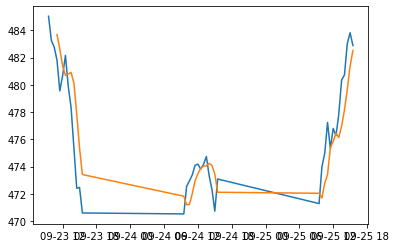

In [5]:
plt.plot(netflix_df['Datetime'], netflix_df[['Adj Close', 'SMA(3)']])

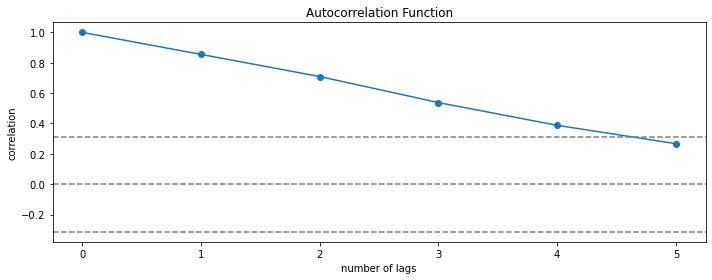

In [6]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(netflix_df['Adj Close'], nlags=5)
plt.figure(figsize=(10, 4))
#Plot ACF: 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(netflix_df['Adj Close'])),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(netflix_df['Adj Close'])),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

### Introduce Headlines:

In [89]:
netflix_headlines = pd.read_csv('~/LighthouseLabs-Final/FinViz_Headline_Data/NFLX_data_2020-09-28-07-02.csv', index_col=1, parse_dates=[['date','time']])

In [90]:
def preprocess_headlines(data):
    data.drop_duplicates(subset='headline',keep=False, inplace=True)
    data.drop('ticker', axis=1, inplace=True)
    data.set_index('date_time', inplace=True)
    data_30m = data.resample('30min').median().ffill().reset_index()
    change_in_sent=calc_change_sentiment(data_30m, 'compound')
    data_30m['change in sentiment headlines'] = change_in_sent

    news_d22, news_d23,news_d24,news_d25,news_d26,news_d27,news_d28,news_d29,news_d30,news_d31,news_d32,news_d33,news_d34 = classify_news(data_30m, 'date_time')

    news_d23_red,news_d24_red,news_d25_red,news_d26_red,news_d27_red,news_d28_red,news_d29_red,news_d30_red,news_d31_red,news_d32_red,news_d33_red,news_d34_red = news_d23.iloc[1:],news_d24.iloc[1:],news_d25.iloc[1:],news_d26.iloc[1:],news_d27.iloc[1:],news_d28.iloc[1:],news_d29.iloc[1:],news_d30.iloc[1:],news_d31.iloc[1:],news_d32.iloc[1:],news_d33.iloc[1:],news_d34.iloc[1:]

    frames_news = [news_d23_red,news_d24_red, news_d25_red]
    netflix_headlines_30m_d23_24_25 = pd.concat(frames_news)
    return netflix_headlines_30m_d23_24_25
    

netflix_headlines_30m = clean_headlines(netflix_headlines)

netflix_headlines.drop_duplicates(subset='headline',keep=False, inplace=True)
netflix_headlines.drop('ticker', axis=1, inplace=True)
netflix_headlines.set_index('date_time', inplace=True)
netflix_headlines_30m = netflix_headlines.resample('30min').median().ffill().reset_index()
change_in_sent=calc_change_sentiment(netflix_headlines_30m, 'compound')
netflix_headlines_30m['change in sentiment headlines'] = change_in_sent

news_d22, news_d23,news_d24,news_d25,news_d26,news_d27,news_d28,news_d29,news_d30,news_d31,news_d32,news_d33,news_d34 = classify_news(netflix_headlines_30m, 'date_time')

news_d23_red,news_d24_red,news_d25_red,news_d26_red,news_d27_red,news_d28_red,news_d29_red,news_d30_red,news_d31_red,news_d32_red,news_d33_red,news_d34_red = news_d23.iloc[1:],news_d24.iloc[1:],news_d25.iloc[1:],news_d26.iloc[1:],news_d27.iloc[1:],news_d28.iloc[1:],news_d29.iloc[1:],news_d30.iloc[1:],news_d31.iloc[1:],news_d32.iloc[1:],news_d33.iloc[1:],news_d34.iloc[1:]

frames_news = [news_d23_red,news_d24_red, news_d25_red]
netflix_headlines_30m_d23_24_25 = pd.concat(frames_news)

In [91]:
headlines_final = preprocess_headlines(netflix_headlines)
headlines_final.shape

(39, 6)

In [92]:
netflix_df = netflix_df.merge(netflix_headlines_30m_d23_24_25, left_on='Datetime', right_on='date_time').drop('date_time',axis=1)

In [93]:
netflix_df['t+1'] = netflix_df['Adj Close'].shift(-1)
netflix_df.shape

(39, 29)

In [94]:
netflix_df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume,Percent Price Change Within Period,Change in Close Price,SMA(3),...,pos_y,compound_y,scaled_followers_count,adj compound,change in sentiment twitter,neg,neu,pos,compound,change in sentiment headlines_y
0,2020-09-23 09:30:00,491.040009,491.040009,484.339996,485.029999,485.029999,348946,-1.223935,NaN,NaN,...,0.099,0.33820,1.000204,0.338887,-0.063373,0.0,1.0,0.0,0.0,0.0
1,2020-09-23 10:00:00,485.040009,485.880005,481.640015,483.250000,483.250000,204992,-0.369043,-1.779999,NaN,...,0.000,0.00000,1.000710,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0
2,2020-09-23 10:30:00,483.589996,484.619995,482.100006,482.769989,482.769989,157004,-0.169567,-0.480011,NaN,...,0.049,0.20230,1.000895,0.202711,0.202711,0.0,1.0,0.0,0.0,0.0
3,2020-09-23 11:00:00,482.989990,484.000000,481.260010,481.809998,481.809998,164779,-0.244310,-0.959991,483.683329,...,0.000,0.00000,1.000501,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0
4,2020-09-23 11:30:00,481.609985,481.872406,478.500000,479.549988,479.549988,209145,-0.427731,-2.260010,482.609996,...,0.109,0.46775,1.000138,0.467758,0.467758,0.0,1.0,0.0,0.0,0.0


### Predicting using Linear Modeling (no sentiment):

In [95]:
def linear_modeling_no_sentiment(dataframe):
    y_train = dataframe['t+1'][:30]
    X_train = dataframe[['Adj Close','Volume']][:30]
    y_test = dataframe['t+1'][30:-1]
    X_test = dataframe[['Adj Close','Volume']][30:-1]

    lm = LinearRegression()
    lm.fit(X_train,y_train)
    predictions = lm.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test,predictions))
    r2_sco = r2_score(y_test,predictions)
    print('LR Root Mean Squared Error: ',rmse)
    print('LR R2 Score: ', r2_sco, '\n')
    
    reg = SGDRegressor(random_state=42)
    reg.fit(X_train, y_train)
    predictions2 = reg.predict(X_test)
    rmse2 = np.sqrt(mean_squared_error(y_test,predictions2))
    r2_sco2 = r2_score(y_test,predictions2)
    print('SGD Root Mean Squared Error: ',rmse2)
    print('SGD R2 Score: ', r2_sco2)

In [96]:
linear_modeling_no_sentiment(netflix_df)

LR Root Mean Squared Error:  2.08697812700369
LR R2 Score:  0.4282697651877275 

SGD Root Mean Squared Error:  1.053640980645304e+20
SGD R2 Score:  -1.4572721749727684e+39


y_train = netflix_df['t+1'][:30]
X_train = netflix_df[['Adj Close','Volume']][:30]
y_test = netflix_df['t+1'][30:-1]
X_test = netflix_df[['Adj Close','Volume']][30:-1]

import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train)
#print(model.summary(),'\n')

from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
#print('Model Score: ',lm.score(X,y))

rmse = np.sqrt(mean_squared_error(y_test,predictions))
r2_sco = r2_score(y_test,predictions)
print('Root Mean Squared Error: ',rmse)
print('R2 Score: ', r2_sco)


### Predicting with Linear Model (with headlines):

In [87]:
def linear_modeling_headlines(dataframe):
    y_train2 = dataframe['t+1'][:30]
    X_train2 = dataframe[['Adj Close','Volume','compound']][:30]
    y_test2 = dataframe['t+1'][30:-1]
    X_test2 = dataframe[['Adj Close','Volume','compound']][30:-1]

    lm2 = LinearRegression()
    lm2.fit(X_train2,y_train2)
    predictions2 = lm2.predict(X_test2)

    rmse2 = np.sqrt(mean_squared_error(y_test2,predictions2))
    r2_sco2 = r2_score(y_test2,predictions2)
    print('LR Root Mean Squared Error: ',rmse2)
    print('LR R2 Score: ', r2_sco2,'\n')
    
    reg = SGDRegressor(random_state=42)
    reg.fit(X_train2, y_train2)
    predictions2 = reg.predict(X_test2)
    rmse2 = np.sqrt(mean_squared_error(y_test2,predictions2))
    r2_sco2 = r2_score(y_test2,predictions2)
    print('SGD Root Mean Squared Error: ',rmse2)
    print('SGD R2 Score: ', r2_sco2)

In [88]:
linear_modeling_headlines(netflix_df)

KeyError: "['compound'] not in index"

y_train = netflix_df['t+1'][:30]
X_train = netflix_df[['Adj Close','Volume','compound']][:30]
y_test = netflix_df['t+1'][30:-1]
X_test = netflix_df[['Adj Close','Volume','compound']][30:-1]

import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train)
#print(model.summary(),'\n')

from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
#print('Model Score: ',lm.score(X,y))

rmse = np.sqrt(mean_squared_error(y_test,predictions))
r2_sco = r2_score(y_test,predictions)
print('Root Mean Squared Error: ',rmse)
print('R2 Score: ', r2_sco)


from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(random_state=42)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,predictions))
r2_sco = r2_score(y_test,predictions)
print('Root Mean Squared Error: ',rmse)
print('R2 Score: ', r2_sco)

### Prediction with Linear Model (with Twitter):

In [42]:
twitter_d23 = pd.read_csv('~/LighthouseLabs-Final/Twitter_Data/NFLX_2020-09-23.csv', parse_dates=['timestamp'])
twitter_d24 = pd.read_csv('~/LighthouseLabs-Final/Twitter_Data/NFLX_2020-09-24.csv', parse_dates=['timestamp'])
twitter_d25 = pd.read_csv('~/LighthouseLabs-Final/Twitter_Data/NFLX_2020-09-25.csv', parse_dates=['timestamp'])

frames = [twitter_d23, twitter_d24, twitter_d25]
twitter_df = pd.concat(frames)
twitter_df.drop_duplicates(subset='tweet_text',keep=False, inplace=True)

In [61]:
def preprocess_posts(dataframe):
    dataframe['tweet_text'] = clean_tweets(dataframe['tweet_text'])
    scores = dataframe['tweet_text'].apply(vader.polarity_scores).tolist()
    scores_df = pd.DataFrame(scores)

    df = dataframe.join(scores_df, rsuffix='_right')
    df = df[['timestamp','tweet_text','followers_count','neg','neu','pos','compound']]
    df['timestamp'] = df['timestamp'].dt.tz_localize('UTC').dt.tz_convert('America/Montreal').dt.tz_localize(None)
    df['scaled_followers_count'] =(df['followers_count']/df['followers_count'].max()) + 1
    df['adj compound'] = df['compound']*df['scaled_followers_count']
    df.set_index('timestamp', inplace=True)

    twitter_df_hourly = df.resample('30min').median().ffill().reset_index()
    change_in_sent = calc_change_sentiment(twitter_df_hourly, 'adj compound')
    twitter_df_hourly['change in sentiment twitter'] = change_in_sent

    tw_news_d22,tw_news_d23,tw_news_d24,tw_news_d25,tw_news_d26,tw_news_d27,tw_news_d28,tw_news_d29,tw_news_d30,tw_news_d31,tw_news_d32,tw_news_d33,tw_news_d34 = classify_news(twitter_df_hourly, 'timestamp')

    tw_news_d23_30m,tw_news_d24_30m,tw_news_d25_30m, tw_news_d26_30m,tw_news_d27_30m,tw_news_d28_30m,tw_news_d29_30m,tw_news_d30_30m,tw_news_d31_30m,tw_news_d32_30m,tw_news_d33_30m,tw_news_d34_30m = tw_news_d23.iloc[1:],tw_news_d24.iloc[1:],tw_news_d25.iloc[1:],tw_news_d26.iloc[1:],tw_news_d27.iloc[1:],tw_news_d28.iloc[1:],tw_news_d29.iloc[1:],tw_news_d30.iloc[1:],tw_news_d31.iloc[1:],tw_news_d32.iloc[1:],tw_news_d33.iloc[1:],tw_news_d34.iloc[1:]

    frames = [tw_news_d23_30m,tw_news_d24_30m,tw_news_d25_30m, tw_news_d26_30m,tw_news_d27_30m,tw_news_d28_30m,tw_news_d29_30m,tw_news_d30_30m,tw_news_d31_30m,tw_news_d32_30m,tw_news_d33_30m,tw_news_d34_30m]
    tw_news_30min = pd.concat(frames)
    return tw_news_30min

In [64]:
final_twitter = preprocess_posts(twitter_df)
final_twitter.head()

,timestamp,followers_count,neg,neu,pos,compound,scaled_followers_count,adj compound,change in sentiment twitter
27,2020-09-23 09:30:00,442.0,0.0,0.8850,0.099,0.33820,1.000204,0.338887,-0.063373
28,2020-09-23 10:00:00,1536.0,0.0,0.9280,0.000,0.00000,1.000710,0.000000,0.000000
29,2020-09-23 10:30:00,1937.0,0.0,0.9220,0.049,0.20230,1.000895,0.202711,0.202711
30,2020-09-23 11:00:00,1085.0,0.0,0.9165,0.000,0.00000,1.000501,0.000000,0.000000
31,2020-09-23 11:30:00,299.5,0.0,0.8705,0.109,0.46775,1.000138,0.467758,0.467758


In [65]:
tw_news_30min.head()

,timestamp,followers_count,neg,neu,pos,compound,scaled_followers_count,adj compound,change in sentiment twitter
27,2020-09-23 09:30:00,442.0,0.0,0.8850,0.099,0.33820,1.000204,0.338887,-0.063373
28,2020-09-23 10:00:00,1536.0,0.0,0.9280,0.000,0.00000,1.000710,0.000000,0.000000
29,2020-09-23 10:30:00,1937.0,0.0,0.9220,0.049,0.20230,1.000895,0.202711,0.202711
30,2020-09-23 11:00:00,1085.0,0.0,0.9165,0.000,0.00000,1.000501,0.000000,0.000000
31,2020-09-23 11:30:00,299.5,0.0,0.8705,0.109,0.46775,1.000138,0.467758,0.467758


twitter_df['tweet_text'] = clean_tweets(twitter_df['tweet_text'])
scores = twitter_df['tweet_text'].apply(vader.polarity_scores).tolist()
scores_df = pd.DataFrame(scores)
df = twitter_df.join(scores_df, rsuffix='_right')
df = df[['timestamp','tweet_text','followers_count','neg','neu','pos','compound']]
df['timestamp'] = df['timestamp'].dt.tz_localize('UTC').dt.tz_convert('America/Montreal').dt.tz_localize(None)

df['scaled_followers_count'] =(df['followers_count']/df['followers_count'].max()) + 1
df['adj compound'] = df['compound']*df['scaled_followers_count']
df.set_index('timestamp', inplace=True)

twitter_df_hourly = df.resample('30min').median().ffill().reset_index()
change_in_sent = calc_change_sentiment(twitter_df_hourly, 'adj compound')
#twitter_df_hourly['change in sentiment twitter'] = twitter_df_hourly['adj compound'].diff(periods=1)
twitter_df_hourly['change in sentiment twitter'] = change_in_sent

twitter_df_hourly = cleaning_posts(twitter_df)

tw_news_d22,tw_news_d23,tw_news_d24,tw_news_d25,tw_news_d26,tw_news_d27,tw_news_d28,tw_news_d29,tw_news_d30,tw_news_d31,tw_news_d32,tw_news_d33,tw_news_d34 = classify_news(twitter_df_hourly, 'timestamp')

tw_news_d23_30m,tw_news_d24_30m,tw_news_d25_30m, tw_news_d26_30m,tw_news_d27_30m,tw_news_d28_30m,tw_news_d29_30m,tw_news_d30_30m,tw_news_d31_30m,tw_news_d32_30m,tw_news_d33_30m,tw_news_d34_30m = tw_news_d23.iloc[1:],tw_news_d24.iloc[1:],tw_news_d25.iloc[1:],tw_news_d26.iloc[1:],tw_news_d27.iloc[1:],tw_news_d28.iloc[1:],tw_news_d29.iloc[1:],tw_news_d30.iloc[1:],tw_news_d31.iloc[1:],tw_news_d32.iloc[1:],tw_news_d33.iloc[1:],tw_news_d34.iloc[1:]

frames = [tw_news_d23_30m,tw_news_d24_30m,tw_news_d25_30m, tw_news_d26_30m,tw_news_d27_30m,tw_news_d28_30m,tw_news_d29_30m,tw_news_d30_30m,tw_news_d31_30m,tw_news_d32_30m,tw_news_d33_30m,tw_news_d34_30m]
tw_news_30min = pd.concat(frames)

In [46]:
netflix_df = netflix_df.merge(tw_news_30min, left_on='Datetime', right_on='timestamp').drop('timestamp',axis=1)
netflix_df['t+1'] = netflix_df['Adj Close'].shift(-1)

def linear_model_twitter(dataframe):
    y_train = dataframe['t+1'][:30]
    X_train = dataframe[['Adj Close','Volume','compound_y']][:30]
    y_test = dataframe['t+1'][30:-1]
    X_test = dataframe[['Adj Close','Volume','compound_y']][30:-1]

    lm = LinearRegression()
    lm.fit(X_train,y_train)
    predictions = lm.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test,predictions))
    r2_sco = r2_score(y_test,predictions)
    print('LR Root Mean Squared Error: ',rmse)
    print('LR R2 Score: ', r2_sco,'\n')

    reg = SGDRegressor(random_state=42)
    reg.fit(X_train, y_train)
    predictions2 = reg.predict(X_test)
    rmse2 = np.sqrt(mean_squared_error(y_test,predictions2))
    r2_sco2 = r2_score(y_test,predictions2)
    print('SGD Root Mean Squared Error: ',rmse2)
    print('SGD R2 Score: ', r2_sco2)

In [47]:
linear_model_twitter(netflix_df)

LR Root Mean Squared Error:  2.0309304567070865
LR R2 Score:  0.4585660678849862 

SGD Root Mean Squared Error:  1.0536409806070918e+20
SGD R2 Score:  -1.4572721748670672e+39


y_train = netflix_df['t+1'][:30]
X_train = netflix_df[['Adj Close','Volume','compound_y']][:30]
y_test = netflix_df['t+1'][30:-1]
X_test = netflix_df[['Adj Close','Volume','compound_y']][30:-1]

import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
predictions = model.predict(X_train)
#print(model.summary(),'\n')

from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)
#print('Model Score: ',lm.score(X,y))

rmse = np.sqrt(mean_squared_error(y_test,predictions))
r2_sco = r2_score(y_test,predictions)
print('Root Mean Squared Error: ',rmse)
print('R2 Score: ', r2_sco)

from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(random_state=42)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,predictions))
r2_sco = r2_score(y_test,predictions)
print('Root Mean Squared Error: ',rmse)
print('R2 Score: ', r2_sco)

### Predicing with Linear Model (everything):

In [84]:
netflix_df_full = netflix_df.merge(netflix_headlines_30m_d23_24_25, left_on='Datetime', right_on='date_time').drop('date_time',axis=1)
netflix_df_full['t+1'] = netflix_df_full['Adj Close'].shift(-1)

def multi_model_full(dataframe):
    y_train, y_test = dataframe['t+1'][:round(len(dataframe['t+1'])*0.75)], dataframe['t+1'][round(len(dataframe['t+1'])*0.75):-1]
    X_train, X_test = dataframe[['Adj Close','Volume','compound_y','compound']][:round(len(dataframe['t+1'])*0.75)], dataframe[['Adj Close','Volume','compound_y','compound']][round(len(dataframe['t+1'])*0.75):-1]
    #y_test = dataframe['t+1'][(len(dataframe['t+1'])*0.75):-1]
    #X_test = dataframe[['Adj Close','Volume','compound_y','compound']][(len(dataframe['t+1'])*0.75):-1]

    lm = LinearRegression()
    lm.fit(X_train,y_train)
    predictions = lm.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test,predictions))
    r2_sco = r2_score(y_test,predictions)
    print('LR Root Mean Squared Error: ',rmse)
    print('LR R2 Score: ', r2_sco,'\n')

    reg = SGDRegressor(random_state=42)
    reg.fit(X_train, y_train)
    predictions = reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,predictions))
    r2_sco = r2_score(y_test,predictions)
    print('SGD Root Mean Squared Error: ',rmse)
    print('SGD R2 Score: ', r2_sco,'\n')

    xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.03,
                max_depth = 5, alpha = 10, n_estimators = 1000)
    xg_reg.fit(X_train,y_train)
    preds = xg_reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2_sco = r2_score(y_test,preds)
    print('XGB Mean Squared Error: ',rmse)
    print('XGB R2 Score: ', r2_sco)

In [85]:
multi_model_full(netflix_df_full)

LR Root Mean Squared Error:  1.9929426690971284
LR R2 Score:  0.5653149773315831 

SGD Root Mean Squared Error:  3.1762892027619746e+19
SGD R2 Score:  -1.1041425387738091e+38 

XGB Mean Squared Error:  2.3251969867143027
XGB R2 Score:  0.4082959138363267


from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(random_state=42)
reg.fit(X_train, y_train)
predictions = reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,predictions))
r2_sco = r2_score(y_test,predictions)
print('Root Mean Squared Error: ',rmse)
print('R2 Score: ', r2_sco)

import xgboost as xgb

netflix_df_full['t+1'] = netflix_df_full['Adj Close'].shift(-1)

y_train = netflix_df_full['t+1'][:30]
X_train = netflix_df_full[['Adj Close','Volume','compound_y','compound']][:30]
y_test = netflix_df_full['t+1'][30:-1]
X_test = netflix_df_full[['Adj Close','Volume','compound_y','compound']][30:-1]

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.03,
                max_depth = 5, alpha = 10, n_estimators = 1000)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2_sco = r2_score(y_test,preds)
print('Mean Squared Error: ',rmse)
print('R2 Score: ', r2_sco)